# Tensors张量

In [1]:
from __future__ import print_function
import torch

In [2]:
x=torch.empty(5,3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
x=torch.rand(5,3)
x

tensor([[0.3021, 0.9912, 0.1131],
        [0.6041, 0.9585, 0.2200],
        [0.4810, 0.4968, 0.1927],
        [0.6699, 0.6032, 0.2593],
        [0.7007, 0.5271, 0.5282]])

In [4]:
x=torch.randn(5,3)
x

tensor([[-0.1927,  0.0707,  1.7531],
        [ 1.1842, -0.9251, -0.5787],
        [ 0.2699,  0.2454,  1.6499],
        [-0.9305, -0.7388,  2.1403],
        [ 2.1426, -0.6334, -0.4885]])

In [5]:
x=torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [6]:
x=torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

In [7]:
x=x.new_ones(5,3,dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [8]:
x=torch.randn_like(x,dtype=torch.float)
x

tensor([[-0.4488,  0.8980, -1.3151],
        [ 0.9810,  0.2329, -1.3300],
        [ 0.1453, -0.4274,  1.2028],
        [-1.3903,  0.4090, -1.0166],
        [-2.1724, -0.8368,  0.4842]])

In [9]:
x.size()

torch.Size([5, 3])

In [10]:
y=torch.rand(5,3)
x+y

tensor([[ 0.2442,  1.2464, -0.5284],
        [ 1.5292,  0.5682, -0.8444],
        [ 1.0235,  0.1397,  1.9801],
        [-0.6179,  0.9790, -0.4185],
        [-1.7117, -0.0317,  1.0997]])

In [11]:
torch.add(x,y)

tensor([[ 0.2442,  1.2464, -0.5284],
        [ 1.5292,  0.5682, -0.8444],
        [ 1.0235,  0.1397,  1.9801],
        [-0.6179,  0.9790, -0.4185],
        [-1.7117, -0.0317,  1.0997]])

In [12]:
result=torch.empty(5,3)
torch.add(x,y,out=result)
result

tensor([[ 0.2442,  1.2464, -0.5284],
        [ 1.5292,  0.5682, -0.8444],
        [ 1.0235,  0.1397,  1.9801],
        [-0.6179,  0.9790, -0.4185],
        [-1.7117, -0.0317,  1.0997]])

In [13]:
y.add_(x)
y

tensor([[ 0.2442,  1.2464, -0.5284],
        [ 1.5292,  0.5682, -0.8444],
        [ 1.0235,  0.1397,  1.9801],
        [-0.6179,  0.9790, -0.4185],
        [-1.7117, -0.0317,  1.0997]])

In [14]:
print(x)
print(x[:,1])

tensor([[-0.4488,  0.8980, -1.3151],
        [ 0.9810,  0.2329, -1.3300],
        [ 0.1453, -0.4274,  1.2028],
        [-1.3903,  0.4090, -1.0166],
        [-2.1724, -0.8368,  0.4842]])
tensor([ 0.8980,  0.2329, -0.4274,  0.4090, -0.8368])


In [15]:
x=torch.randn(4,4)
y=x.view(16)
z=x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [16]:
x=torch.randn(1)
print(x)
print(x.item())

tensor([-0.5830])
-0.583007276058197


# Pytorch自动微分

In [17]:
import torch

In [18]:
x=torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [19]:
y=x+2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [20]:
print(y.grad_fn)

In [21]:
z=y*y*3

In [22]:
out=z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [23]:
a=torch.randn(2,2)
a=((a*3)/(a-1))
a.requires_grad

False

In [24]:
a.requires_grad_(True)
print(a.requires_grad)

True


# Pytorch 神经网络

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,self.num_flat_features(x))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    def num_flat_features(self,x):
        size=x.size()[1:]
        num_features=1
        for s in size:
            num_features*=s
        return num_features
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [31]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [32]:
input=torch.randn(1,1,32,32)
out=net(input)
print(out)

tensor([[ 0.0532,  0.0849,  0.1086,  0.0293, -0.1155, -0.0708, -0.1785, -0.0133,
         -0.0217, -0.1080]], grad_fn=<AddmmBackward>)


In [33]:
params=list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [34]:
input=torch.randn(1,1,32,32)
out=net(input)
print(out)

tensor([[ 0.0570,  0.0987,  0.1128,  0.0281, -0.1316, -0.0668, -0.1645, -0.0002,
         -0.0230, -0.1030]], grad_fn=<AddmmBackward>)


In [35]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [36]:
output=net(input)
target=torch.randn(10)
target=target.view(1,-1)
criterion=nn.MSELoss()
loss=criterion(output,target)
print(loss)

tensor(0.9098, grad_fn=<MseLossBackward>)


In [37]:
learning_rate=0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)
    

In [38]:
import torch.optim as optim
optimizer=optim.SGD(net.parameters(),lr=0.01)

optimizer.zero_grad()
output=net(input)
loss=criterion(output,target)
loss.backward()
optimizer.step()

# Pytorch图像分类器

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')


  0%|                                                                  | 196608/170498071 [11:40<181:59:17, 259.94it/s]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0))
    plt.show()

dataiter=iter(trainloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s'%classes[labels[j]]for j in range(4)))
               

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [ ]:
net=Net()

In [ ]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)


In [ ]:
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss=0.0
print('Finished Training')

In [ ]:
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join('%5s'%classes[predicted[j]]
                            for j in range(4)))

In [ ]:
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs.net(images)
        _,predicted=torch.max(outputs.data ,1)
        total+=labels.size(0)
        correct+=(predict==labels).sum().item()
    print('Accuracy of the network on the 10000 test images:%d%%'(100*correct/total))
    

In [ ]:
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range (10))
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs,1)
        c=(predicted==labels).squeeze()
        for i in range(4):
            label=labels[i]
            class_correct[label]+=c[i].item()
            class_total[label]+=1
for i in range(10):
    print('Accuracy of %5s :%2d %%'%(classes[i],100*class_correct[i]/class_total[i]))

# 数据加载和处理

In [2]:
from __future__ import print_function,division
import os
import torch
import pandas as pd
#from skimage import io,transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,utils

In [3]:
import warnings
warnings.filterwarnings('ignore')
plt.ion()


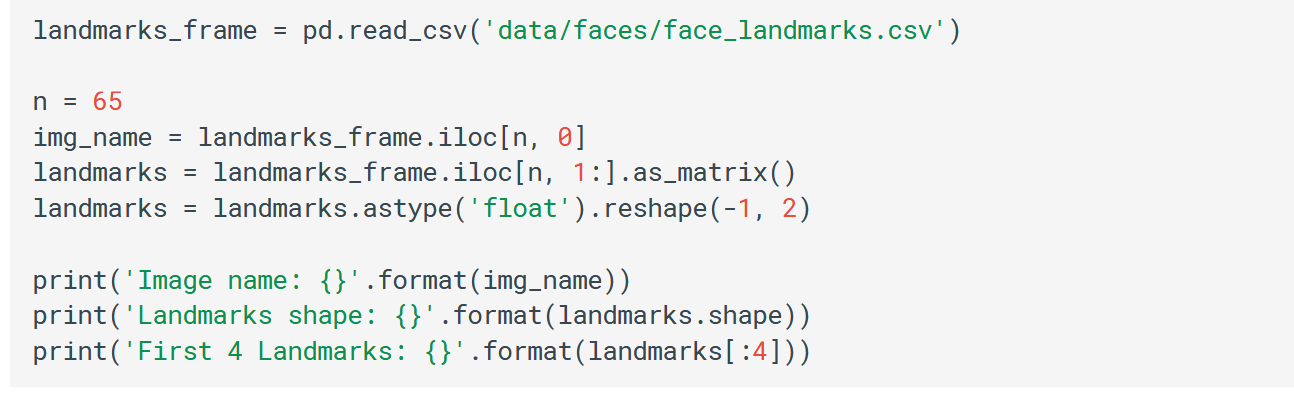

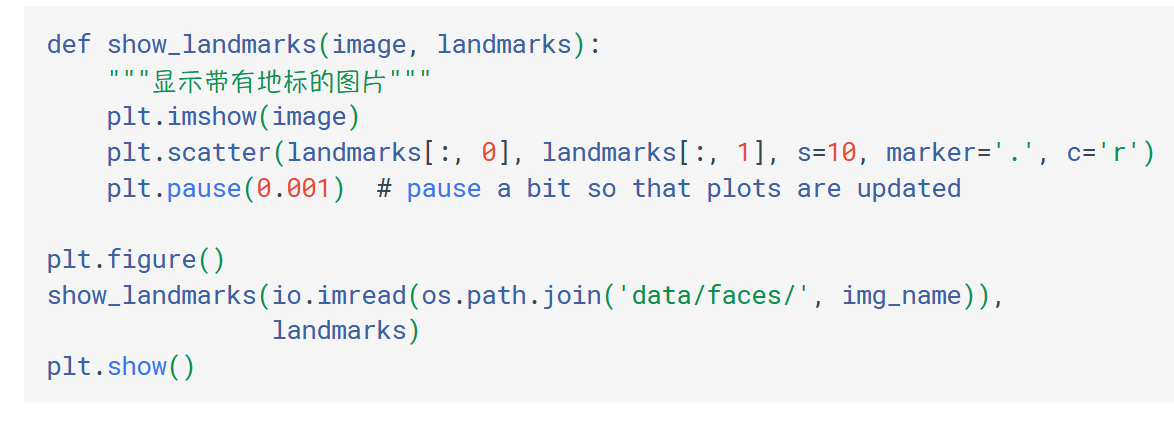

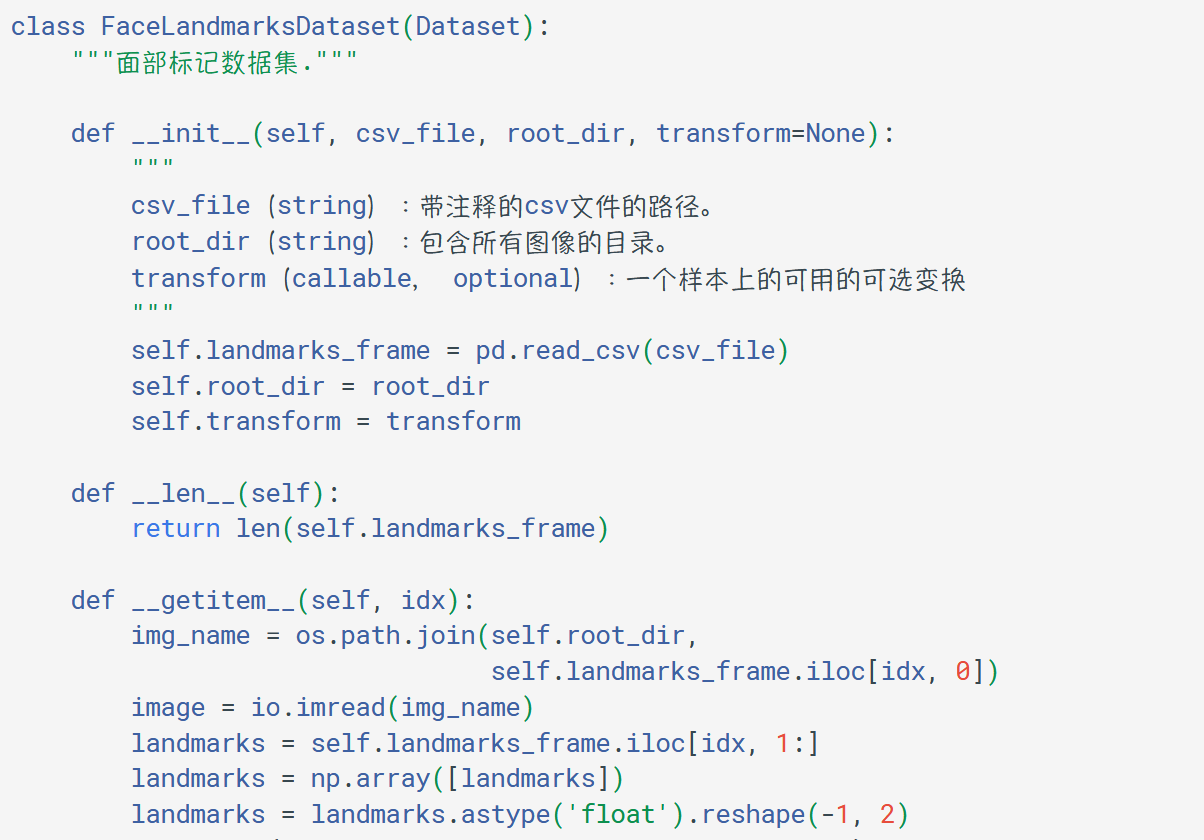

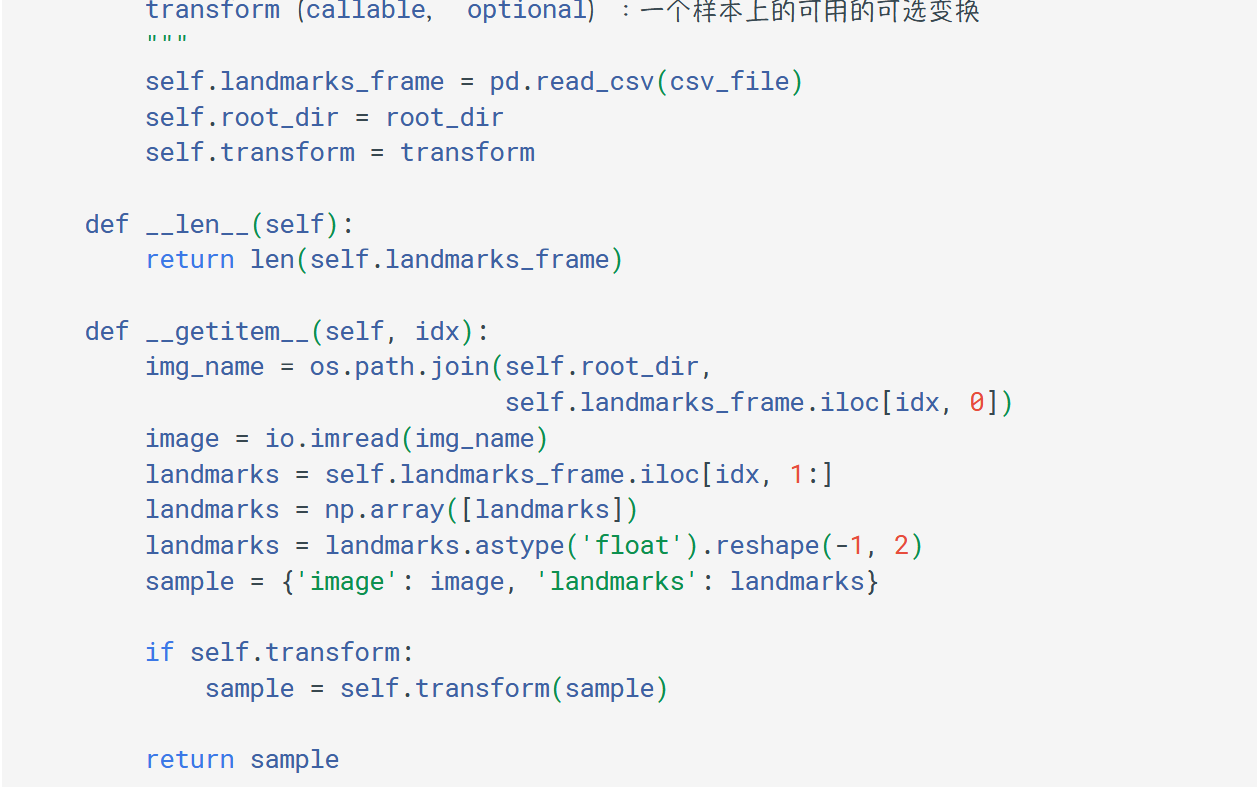

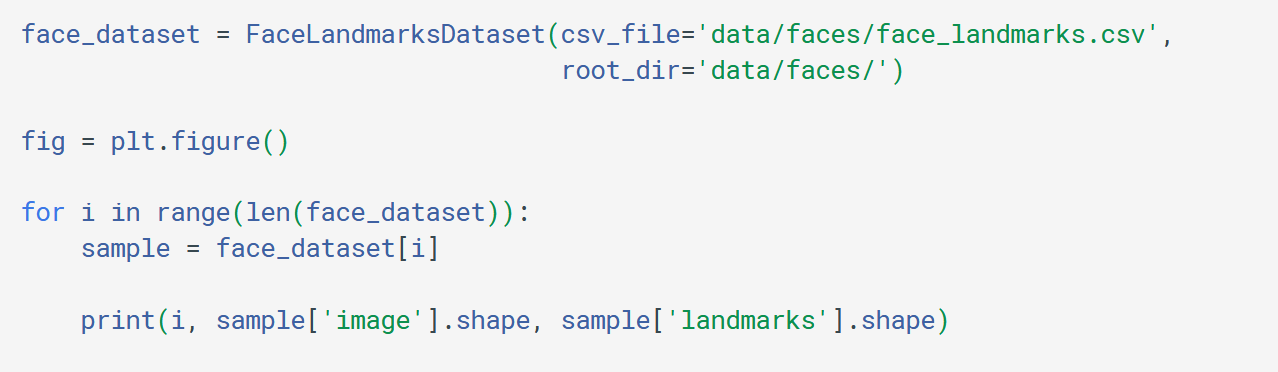

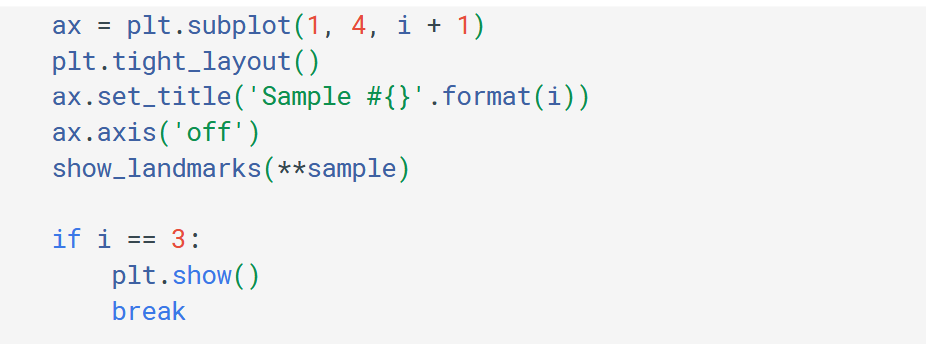

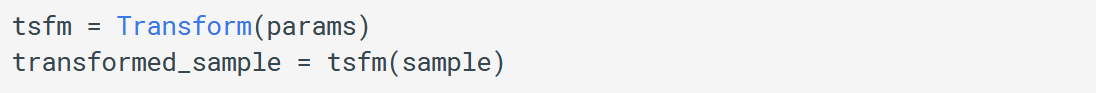

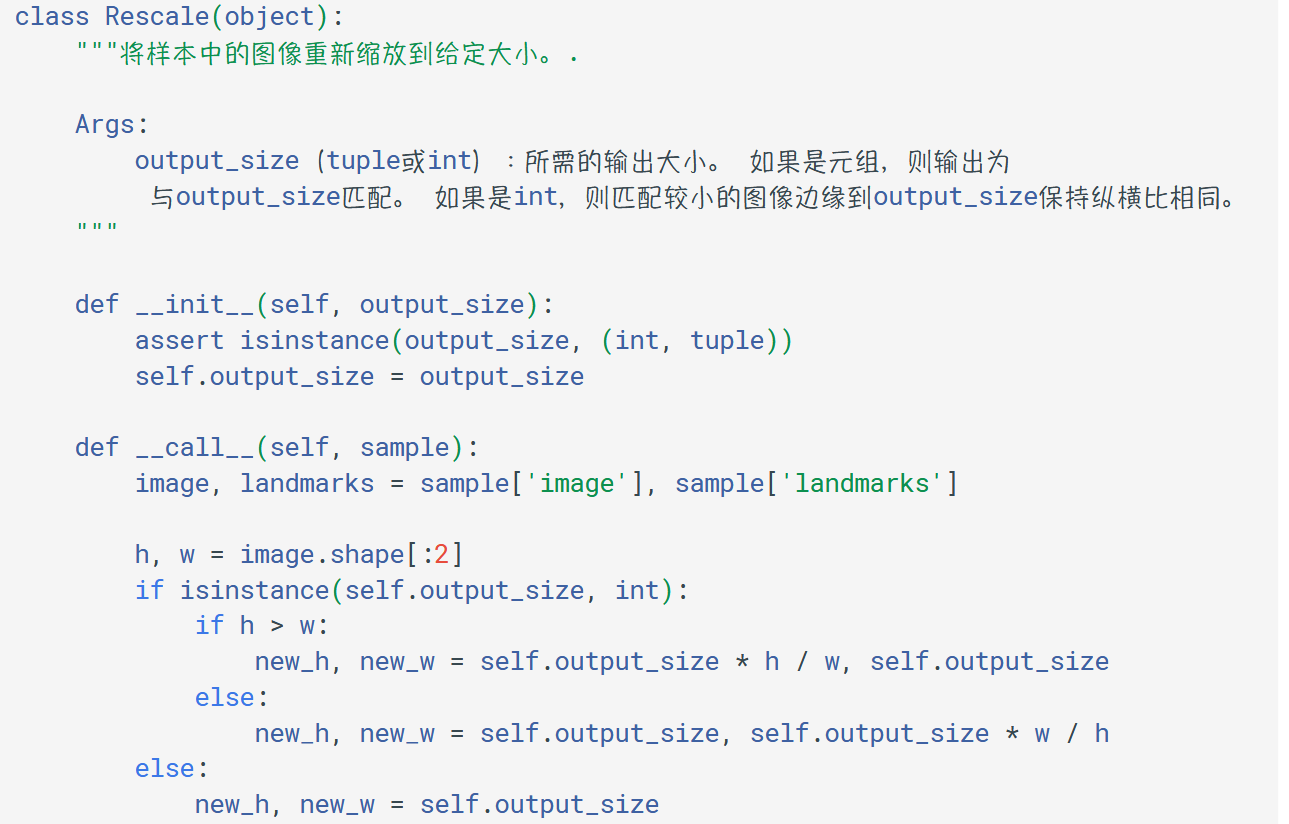

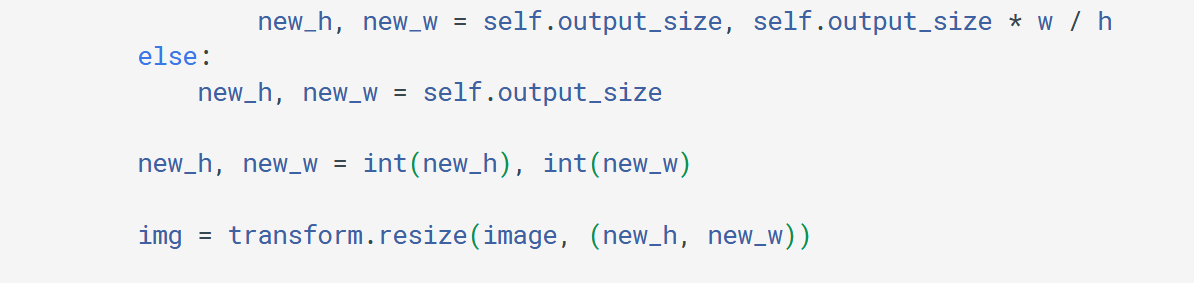

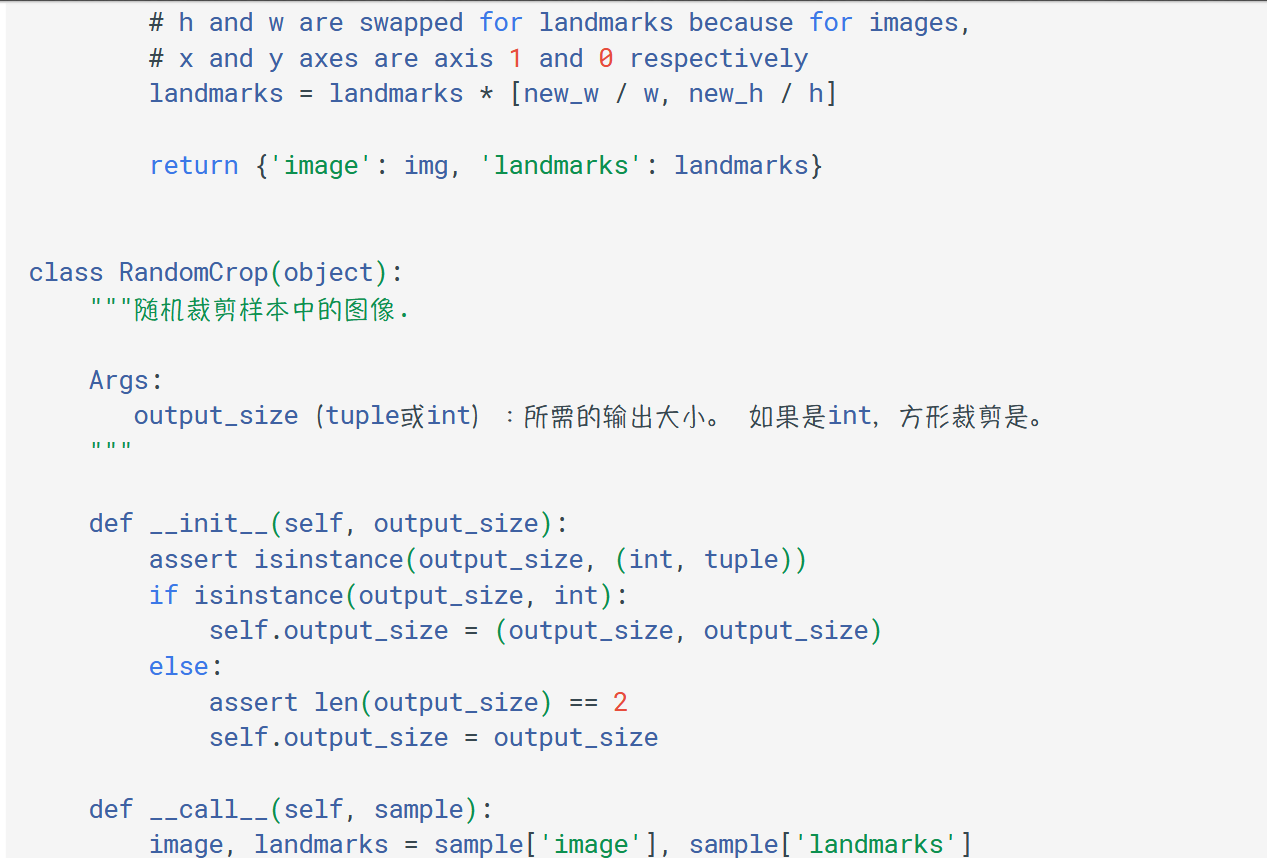

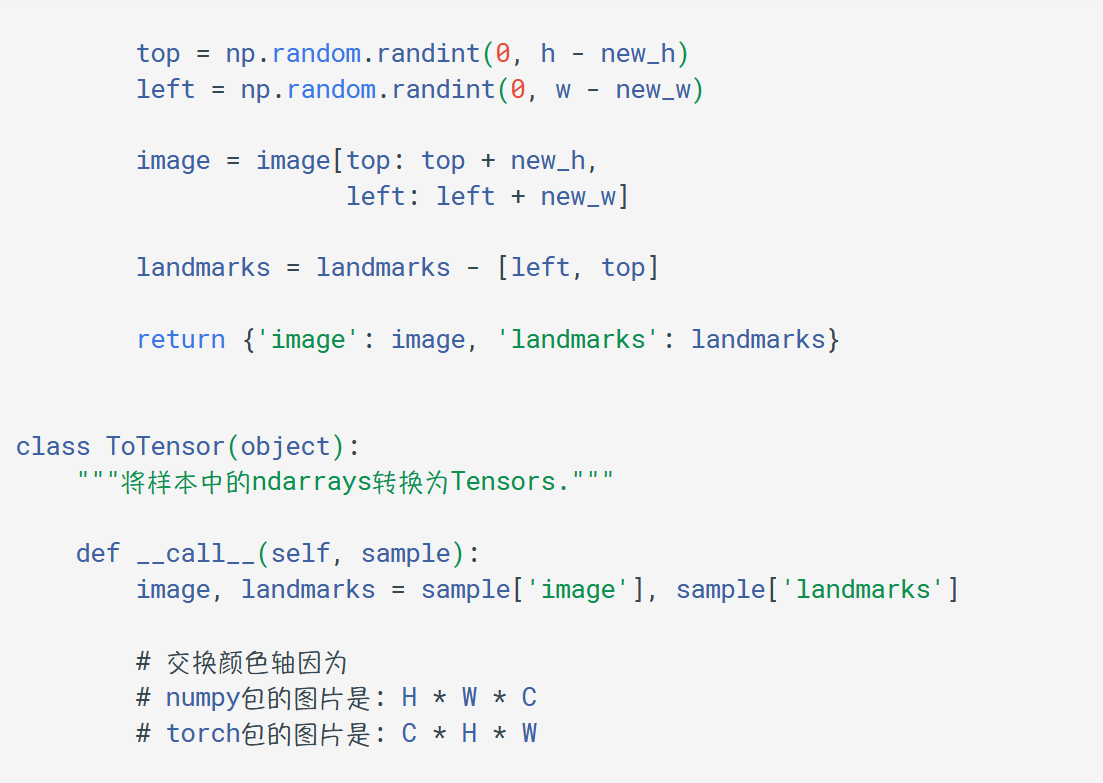

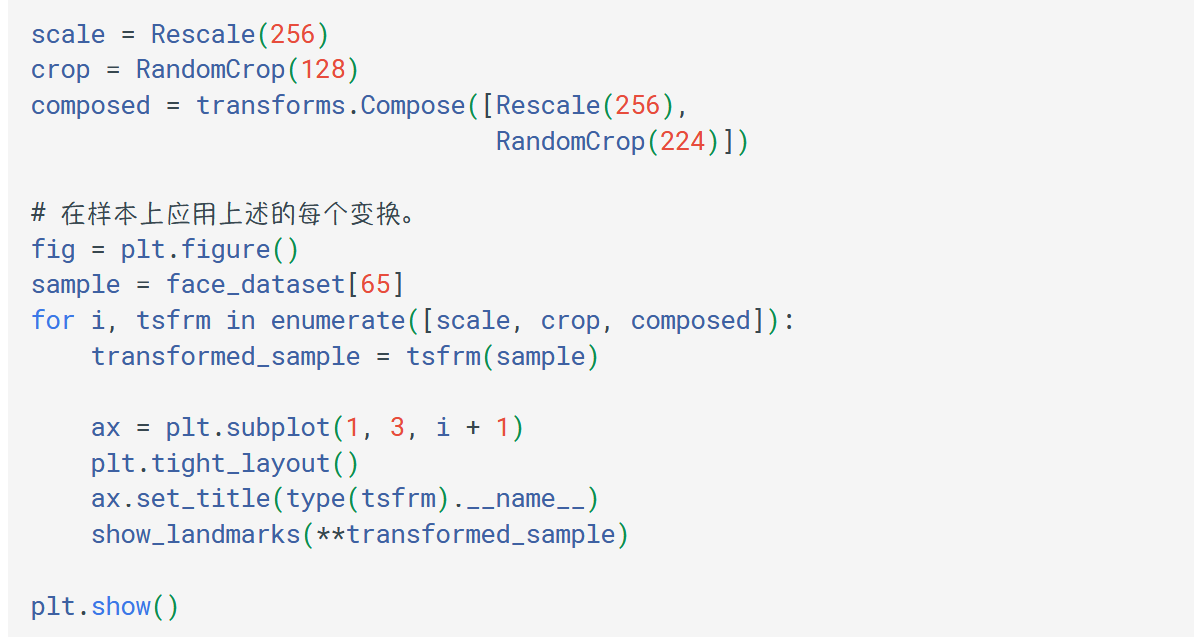

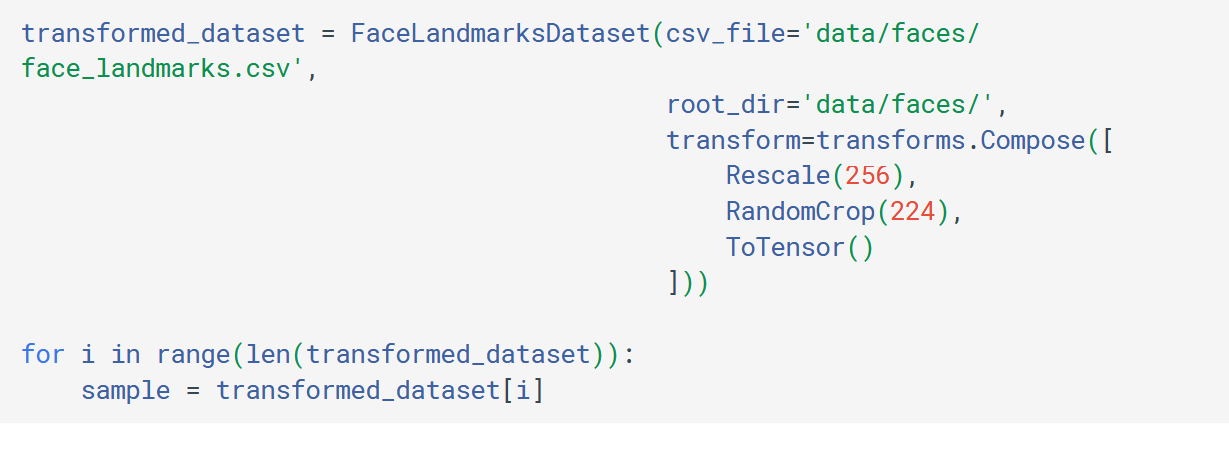

# Pytorch 之小试牛刀

In [4]:
# -*- coding :utf-8 -*-
import numpy as np

N,D_in,H,D_out=64,1000,100,10

x=np.random.randn(N,D_in)
y=np.random.randn(N,D_out)

w1=np.random.randn(D_in,H)
w2=np.random.randn(H,D_out)

learning_rate=1e-6
for t in range(500):
    h=x.dot(w1)
    h_relu=np.maximum(h,0)
    y_pred=h_relu.dot(w2)
    loss=np.square(y_pred-y).sum()
    print(t,loss)
    
    grad_y_pred=2.0*(y_pred-y)
    grad_w2=h_relu.T.dot(grad_y_pred)
    grad_h_relu=grad_y_pred.dot(w2.T)
    grad_h=grad_h_relu.copy()
    grad_h[h<0]=0
    grad_w1=x.T.dot(grad_h)
    
    #更新权重
    w1-=learning_rate*grad_w1
    w2-=learning_rate*grad_w2
    

0 24071625.868937433
1 21036106.933708053
2 20978078.69037867
3 21608542.438942894
4 21072619.51092522
5 18462291.16812467
6 14208940.422869548
7 9712376.216290234
8 6130603.511793392
9 3752699.996760416
10 2339974.642429455
11 1534987.9014450165
12 1076355.4863630217
13 805580.4550184864
14 636286.8515905242
15 522865.38411512715
16 441713.3719176843
17 380142.7942863519
18 331310.9232914045
19 291295.07433827256
20 257776.20563929883
21 229292.16126137285
22 204781.11563993868
23 183531.19036403598
24 164988.78024693753
25 148720.79628709814
26 134396.7042901754
27 121730.46096679367
28 110489.40414077714
29 100487.01397913662
30 91556.89414878857
31 83551.91965015905
32 76368.71522093029
33 69916.3030769911
34 64113.25121377359
35 58870.28759261666
36 54127.60132774491
37 49826.522818692494
38 45921.67933071441
39 42369.5411082925
40 39136.017231019505
41 36189.12416022207
42 33495.462190961975
43 31031.544716710472
44 28774.30318416352
45 26704.70191251175
46 24803.627700454563
47 

410 0.0006583449851355664
411 0.000630348380554032
412 0.0006035375324956623
413 0.0005778822066831698
414 0.0005533062473129114
415 0.0005297738376954474
416 0.0005072450729574562
417 0.00048567702559586837
418 0.00046503075286179007
419 0.0004452664605948114
420 0.00042635347370112344
421 0.0004082544979722867
422 0.00039090751457612305
423 0.00037430071852836023
424 0.00035840223093821166
425 0.0003431813792497667
426 0.0003286084580962302
427 0.00031465582814196494
428 0.0003013001815820193
429 0.0002885170081330867
430 0.00027627213523186947
431 0.00026454950721201007
432 0.0002533244951648117
433 0.0002425783026977226
434 0.00023228972294959044
435 0.00022243800154452318
436 0.0002130056312660716
437 0.0002039747476889163
438 0.00019533313365308416
439 0.00018705746667703861
440 0.00017913405150763177
441 0.00017155002017297312
442 0.00016428187418603173
443 0.00015732227097851317
444 0.00015065890578948903
445 0.00014427812204722087
446 0.00013816877633332294
447 0.0001323219045

In [5]:
import torch

dtype=torch.float
device=torch.device("cpu")

In [6]:
N,D_in,H,D_out=64,1000,100,10

x=torch.randn(N,D_in,device=device,dtype=dtype)
y=torch.randn(H,D_out,device=device,dtype=dtype)


In [7]:
w1=torch.randn(D_in,H,device=device,dtype=dtype)
w2=torch.randn(H,D_out,device=device,dtype=dtype)


# learning_rate=1e-6
for t in range(500):
    h=x.mm(w1)
    h_relu=h.clamp(min=0)
    y_pred=h_relu.mm(w2)
    
    loss=(y_pred-y).pow(2).sum().item()
    print(t,loss)
    
    grad_y_pred=2.0*(y_pred-y)
    grad_w2=h_relu.t().mm(grad_y_pred)
    grad_h_relu=grad_y_pred.mm(w2.t())
    grad_h=grad_h_relu.clone()
    grad_h[h<0]=0
    grad_w1=x.t().mm(grad_h)
    
    w1-=learning_rate*grad_w1
    w2-=learning_rate*grad_w2
    
    

# 1. Pytorch 之迁移学习

# 2.混合前端的seq2seq模型


# 3. 词嵌入：编码形式的词汇语义

# 4.聊天机器人教程

# 5.序列模型和长短句记忆LSTM模型

# 6.制定动态决策和bi-LSTM CRF

# 7.使用字符级RNN生成名字

# 8. 使用字符级RNN进行名字分类

# 9.使用Sequence2Sequence网络和注意力进行翻译

# 10.GANs生成对抗

# 11.强化学习DQN教程

# 12.通过带Flask的REST API在python 中部署Pytorch

# TorchScript简介